In [1]:
import numpy as np
import scipy
import xarray as xr
import sys
from calendar import monthrange
import os
import matplotlib.pyplot as plt
import cmocean
from scipy import stats,signal


In [2]:
#%% Define data locations
dir_root = "/projects/storm/mgomez/idealSims/sst_30_skipd01_skipCoLES_ndg/Results/afterSpinup/"



In [3]:
#%% Extract data
# Heights to estimate wind direction
iz_MMiin = 0 # 0 # 4
iz_MMaax = 60 # 30 # 7
iz_max = iz_MMaax
iz_inBetween = 4 # 2 # 1

# Choose domain
domain = 'd02'
# File name root
fName = 'auxHist'
# Time for analysis
fTime = '06_11'
fOther = ':30'

# Find auxHist files for current domain within directory
entries = os.listdir(dir_root)
ofInterest = []
for ii in np.arange(len(entries)):
    # Check if file name matches
    if domain in entries[ii]:
        if fName in entries[ii]:
            if fTime in entries[ii]:
                if fOther in entries[ii]:
                    ofInterest = np.append(ofInterest,ii)
ofInterest = ofInterest.astype('int')
rndmFromInterest = np.random.choice(ofInterest)

# entries = ["auxHist24_d04_2017-02-07_11:00:00","auxHist24_d04_2017-02-07_11:10:00"]
# ofInterest = [0,1]

# Extract and save data from each auxHist file
for i_f in np.arange(0,len(ofInterest)):
    # Open file
    ds = xr.open_dataset(dir_root+str(entries[ofInterest[i_f]]),decode_times=False)
    # Extract data
    u_temp = np.array(ds['U'])
    v_temp = np.array(ds['V'])
    w_temp = np.array(ds['W'])
    t_temp = np.array(ds['T']) + 300
    time_temp = np.array(ds['Times'])
    # De-stagger variables
    u_temp = 0.5*(u_temp[:,:,:,0:np.shape(u_temp)[3]-1]+u_temp[:,:,:,1:np.shape(u_temp)[3]])
    v_temp = 0.5*(v_temp[:,:,0:np.shape(v_temp)[2]-1,:]+v_temp[:,:,1:np.shape(v_temp)[2],:])
    w_temp = 0.5*(w_temp[:,0:np.shape(w_temp)[1]-1,:,:]+w_temp[:,1:np.shape(w_temp)[1],:,:])
    # Save variables
    if i_f == 0:
        # Only keep data within heights of interest
        u_temp = u_temp[:,iz_MMiin:iz_max:iz_inBetween,:,:]
        v_temp = v_temp[:,iz_MMiin:iz_max:iz_inBetween,:,:]
        w_temp = w_temp[:,iz_MMiin:iz_max:iz_inBetween,:,:]
        t_temp = t_temp[:,iz_MMiin:iz_max:iz_inBetween,:,:]
        # Create new variables
        u = np.zeros_like(u_temp) + u_temp
        v = np.zeros_like(v_temp) + v_temp
        w = np.zeros_like(w_temp) + w_temp
        theta = np.zeros_like(t_temp) + t_temp
        Time = []
        Time.append(time_temp)
        # Domain dimensions
        dx = ds.DX
        n_x = dx*np.arange(0,np.shape(u)[3])
        n_y = dx*np.arange(0,np.shape(u)[2])
    else: #if i_f>0:
        # Only keep data within heights of interest
        u_temp = u_temp[:,iz_MMiin:iz_max:iz_inBetween,:,:]
        v_temp = v_temp[:,iz_MMiin:iz_max:iz_inBetween,:,:]
        w_temp = w_temp[:,iz_MMiin:iz_max:iz_inBetween,:,:]
        t_temp = t_temp[:,iz_MMiin:iz_max:iz_inBetween,:,:]
        # Append data to saved variables
        u = np.append(u,u_temp,axis=0)
        v = np.append(v,v_temp,axis=0)
        w = np.append(w,w_temp,axis=0)
        theta = np.append(theta,t_temp,axis=0)
        Time.append(time_temp)
    # Free-up memory
    u_temp = 0.0
    v_temp = 0.0
    power_temp = 0.0
    # Close file
    ds.close()
    print("Done with %i out of %i" % (i_f+1,len(ofInterest)))
print("Done extracting data")
    

height_agl = np.array([  10.597356,   32.311485,   55.092354,   78.99515 ,  104.0753  ,
                        130.39023 ,  158.00024 ,  186.9681  ,  217.35979 ,  249.24423 ,
                        282.6931  ,  317.78162 ,  354.5885  ,  393.19598 ,  433.68988 ,
                        476.15973 ,  520.69885 ,  567.405   ,  616.37897 ,  667.7255  ,
                        721.5572  ,  777.9966  ,  836.4701  ,  895.6054  ,  954.67004 ,
                       1013.6671  , 1072.5979  , 1131.4629  , 1190.2615  , 1248.9944  ,
                       1307.6619  , 1366.2639  , 1424.8013  , 1483.2748  , 1541.6855  ,
                       1600.0352  , 1658.3245  , 1716.5544  , 1774.7263  , 1832.8411  ,
                       1890.8989  , 1948.9011  , 2020.3508  , 2109.452   , 2207.3105  ,
                       2314.771   , 2432.7532  , 2562.2632  , 2704.398   , 2860.3533  ,
                       3031.435   , 3219.0693  , 3424.821   , 3650.4092  , 3897.7112  ,
                       4168.765   , 4465.787   , 4791.201   , 5145.6133  , 5513.3467  ])
dz = height_agl[1:] - height_agl[0:-1]
height_stag = np.zeros_like(height_agl)
for i in np.arange(1,len(height_stag)):
    height_stag[i] = height_stag[i-1] + dz[i-1]
height_agl = height_agl[iz_MMiin:iz_max:iz_inBetween]
height_stag = height_stag[iz_MMiin:iz_max+1:iz_inBetween]


Done with 1 out of 21
Done with 2 out of 21
Done with 3 out of 21
Done with 4 out of 21
Done with 5 out of 21
Done with 6 out of 21
Done with 7 out of 21
Done with 8 out of 21
Done with 9 out of 21
Done with 10 out of 21
Done with 11 out of 21
Done with 12 out of 21
Done with 13 out of 21
Done with 14 out of 21
Done with 15 out of 21
Done with 16 out of 21
Done with 17 out of 21
Done with 18 out of 21
Done with 19 out of 21
Done with 20 out of 21
Done with 21 out of 21
Done extracting data


In [4]:
#%% Define moving average function for 1-dimensional array
def moving_average(x, n, mode):
    mv_avg = np.zeros(len(x))
    temp = np.convolve(x, np.ones(n), mode) / n #mode = [full valid same]
    if mode=='valid':
        mv_avg[0:len(x)-n+1] = temp
        # Fill edges with data
        mv_avg[-n:] = np.sum(x[-n:])/n
    elif mode=='same':
        mv_avg = temp
        # Fill edges with data
        mv_avg[0:int(0.5*n)+1] = np.mean(x[0:int(0.5*n)+1])
        mv_avg[-int(0.5*n+1):] = np.mean(x[-int(0.5*n+1):])
    return mv_avg

In [5]:
#%% Turbine specifications
D = 126
z_hh = 90
rated_ws = 11.4

In [6]:
#%% Create time vector (after initialization) (ignore dates)
# Create large datetime64 array
ttime = np.arange('2000-01-01T00:00:00', '2000-01-02T00:00:00',np.shape(Time)[0], dtype='datetime64')
# Save actual times for simulation
for i_t in np.arange(0,np.shape(Time)[0]):
    a = str(Time[i_t])
    ttime[i_t] = np.datetime64(a[3:13] + str(' ')+ a[14:-2])
    # ttime[i_t] = ttime[0] + np.timedelta64(5*60,dtype='datetime64[s]')*i_t
# Save portion of temp array that actually matters
ttime = ttime[0:np.shape(Time)[0]]

print(ttime)

['2000-01-06T11:22:30' '2000-01-06T11:36:30' '2000-01-06T11:02:30'
 '2000-01-06T11:40:30' '2000-01-06T11:12:30' '2000-01-06T11:34:30'
 '2000-01-06T11:06:30' '2000-01-06T11:30:30' '2000-01-06T11:20:30'
 '2000-01-06T11:38:30' '2000-01-06T11:10:30' '2000-01-06T11:00:30'
 '2000-01-06T11:04:30' '2000-01-06T11:18:30' '2000-01-06T11:32:30'
 '2000-01-06T11:16:30' '2000-01-06T11:14:30' '2000-01-06T11:26:30'
 '2000-01-06T11:24:30' '2000-01-06T11:08:30' '2000-01-06T11:28:30']


In [7]:
#%% Sort arrays by time
i_sort = np.argsort(ttime)
u = u[i_sort,:,:,:]
v = v[i_sort,:,:,:]
w = w[i_sort,:,:,:]
theta = theta[i_sort,:,:,:]
ttime = ttime[i_sort]


In [8]:
#%% Time since initialization
t_init = np.datetime64('2000-01-01T00:00:10')

time_sinceInit = ttime - t_init
time_sinceInit = time_sinceInit.astype('timedelta64[s]')

t_since = time_sinceInit.astype('float')/3600 # [hr]


In [9]:
height_agl

array([  10.597356,  104.0753  ,  217.35979 ,  354.5885  ,  520.69885 ,
        721.5572  ,  954.67004 , 1190.2615  , 1424.8013  , 1658.3245  ,
       1890.8989  , 2207.3105  , 2704.398   , 3424.821   , 4465.787   ])

In [10]:
np.min(height_agl[1:] - height_agl[0:-1])

93.477944

In [11]:
#%% Find hub-height
i_hh = np.argmin(np.abs(height_agl - z_hh))


In [12]:
#%% Horizontal velocity field
uv = (u**2 + v**2)**0.5

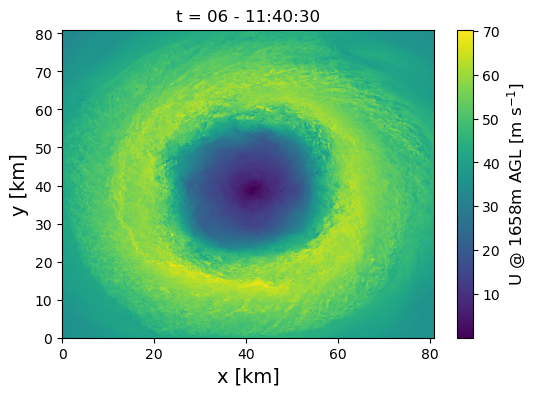

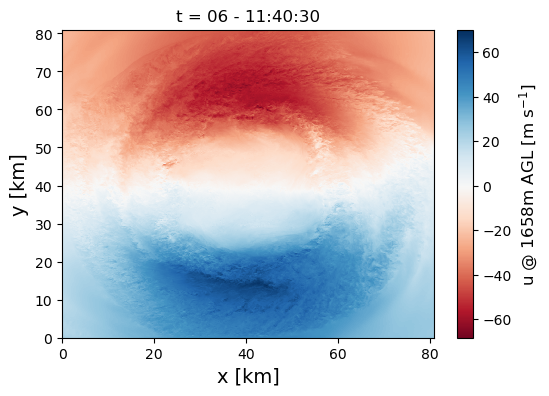

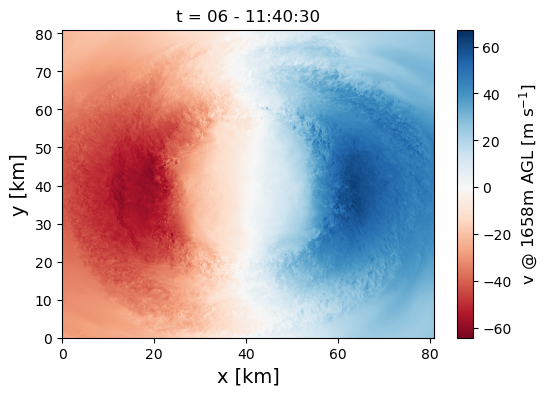

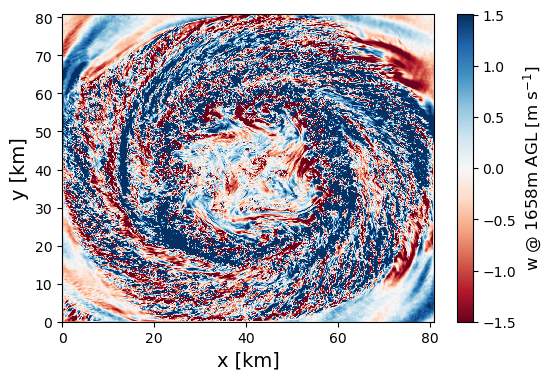

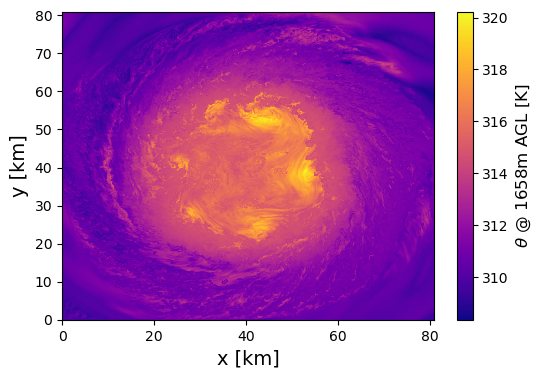

In [13]:
#%% Plot wind speed at one height
iz = np.min([9,len(height_agl)-1])#np.argmin(np.abs(height_agl - z_hh))
it = -1

# Horizontal wind speed
plt.figure(figsize=(6,4))
plt.title('t = '+str(ttime[it])[8:10]+' - '+str(ttime[it])[11:])
im1 = plt.pcolormesh(n_x/1000,n_y/1000,uv[it,iz,:,:])
cbar = plt.colorbar(im1)
cbar.set_label('U @ ' + str(int(height_agl[iz])) + 'm AGL [m s$^{-1}$]',fontsize=12)
plt.ylabel('y [km]',fontsize=14)
plt.xlabel('x [km]',fontsize=14)
#plt.scatter(n_x[4]/1000,n_y[4]/1000,color='r')
#if 'merged_d05.nc' in WRF_FILES:
#    plt.scatter(n_x[locs_ts[:,0]]/1000,n_y[locs_ts[:,1]]/1000,s=5,color='red')
#plt.xlim(143*dx/1000,(143*dx + 403*4500)/1000)
#plt.ylim(143*dx/1000,(143*dx + 403*4500)/1000)
#plt.ylim(2000,4000)
#plt.xlim(2000,4000)
plt.show()
plt.close()


# Zonal wind speed
plt.figure(figsize=(6,4))
u[it,iz,0,0] = 0.5
u[it,iz,0,1] = -0.5
newCmap = cmocean.tools.crop(plt.cm.RdBu, np.min(u[it,iz,:,:]), np.max(u[it,iz,:,:]), 0)
plt.title('t = '+str(ttime[it])[8:10]+' - '+str(ttime[it])[11:])
im1 = plt.pcolormesh(n_x/1000,n_y/1000,u[it,iz,:,:],cmap=newCmap)
cbar = plt.colorbar(im1)
cbar.set_label('u @ ' + str(int(height_agl[iz])) + 'm AGL [m s$^{-1}$]',fontsize=12)
plt.ylabel('y [km]',fontsize=14)
plt.xlabel('x [km]',fontsize=14)
#plt.ylim(2000,4000)
#plt.xlim(2000,4000)
plt.show()
plt.close()

# Meridional wind speed
plt.figure(figsize=(6,4))
v[it,iz,0,0] = 0.5
v[it,iz,0,1] = -0.5
newCmap = cmocean.tools.crop(plt.cm.RdBu, np.min(v[it,iz,:,:]), np.max(v[it,iz,:,:]), 0)
plt.title('t = '+str(ttime[it])[8:10]+' - '+str(ttime[it])[11:])
im1 = plt.pcolormesh(n_x/1000,n_y/1000,v[it,iz,:,:],cmap=newCmap)
cbar = plt.colorbar(im1)
cbar.set_label('v @ ' + str(int(height_agl[iz])) + 'm AGL [m s$^{-1}$]',fontsize=12)
plt.ylabel('y [km]',fontsize=14)
plt.xlabel('x [km]',fontsize=14)
#plt.ylim(400000/1000,600000/1000)
#plt.xlim(400000/1000,600000/1000)
plt.show()
plt.close()


# Vertical wind speed
plt.figure(figsize=(6,4))
minn = -1.5# np.min(w[it,iz,:,:])
maxx = 1.51 #np.max(w[it,iz,:,:])
newCmap = cmocean.tools.crop(plt.cm.RdBu, minn, maxx, 0)
im1 = plt.pcolormesh(n_x/1000,n_y/1000,w[it,iz,:,:],cmap=newCmap,vmin=minn,vmax=maxx)
cbar = plt.colorbar(im1)
cbar.set_label('w @ ' + str(int(height_agl[iz])) + 'm AGL [m s$^{-1}$]',fontsize=12)
plt.ylabel('y [km]',fontsize=14)
plt.xlabel('x [km]',fontsize=14)
#plt.ylim(400000,600000)
#plt.xlim(400000,600000)
plt.show()
plt.close()


# Potential temperature
plt.figure(figsize=(6,4))
im1 = plt.pcolormesh(n_x/1000,n_y/1000,theta[it,iz,:,:],cmap=plt.cm.plasma)
cbar = plt.colorbar(im1)
cbar.set_label(r'$\theta$ @ ' + str(int(height_agl[iz])) + 'm AGL [K]',fontsize=12)
plt.ylabel('y [km]',fontsize=14)
plt.xlabel('x [km]',fontsize=14)
#plt.ylim(400000,600000)
#plt.xlim(400000,600000)
plt.show()
plt.close()



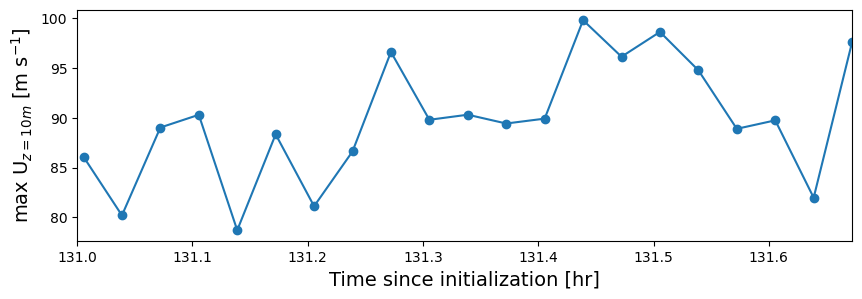

[131.00555556 131.03888889 131.07222222 131.10555556 131.13888889
 131.17222222 131.20555556 131.23888889 131.27222222 131.30555556
 131.33888889 131.37222222 131.40555556 131.43888889 131.47222222
 131.50555556 131.53888889 131.57222222 131.60555556 131.63888889
 131.67222222]
[86.08170319 80.18357849 89.02427673 90.30406952 78.69052124 88.33951569
 81.10469055 86.61675262 96.62367249 89.80284882 90.31279755 89.42742157
 89.91815948 99.81993103 96.14785767 98.64303589 94.78199768 88.89310455
 89.74586487 81.96534729 97.61665344]


In [14]:
#%% Maximum velocity at the surface
temp_uv = np.zeros(np.shape(uv[:,0,:,:])) + uv[:,0,:,:]
temp_uv[:,0:10,:] = np.nan
temp_uv[:,-10:,:] = np.nan
temp_uv[:,:,0:10] = np.nan
temp_uv[:,:,-10:] = np.nan

max_uv_s = np.nanmax(temp_uv[:,:,:],axis=(1,2))

plt.figure(figsize=(10,3))
plt.plot(t_since[:],max_uv_s[:],'-o',zorder=0)
plt.xlabel('Time since initialization [hr]',fontsize=14)
plt.ylabel(r'max U$_{z=10m}$ [m s$^{-1}$]',fontsize=14)
plt.xlim(int(t_since[0]),t_since[-1])
# plt.legend()
plt.show()
plt.close()


# print(np.nanmean(temp_uv[-4]))
# print(ttime[-12])

print(t_since)
print(max_uv_s)



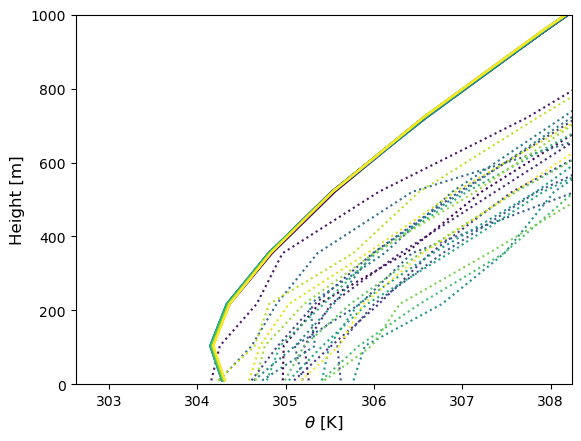

In [15]:
#%% Domain average potential temperature evolution
cols = plt.cm.viridis(np.linspace(0,1,len(ttime)))

x_grid,y_grid = np.meshgrid(n_x,n_y)

theta_avg_sp = np.mean(theta,axis=(2,3))
z_max = 1000 #1500

plt.figure()
for it in np.arange(np.shape(theta)[0]):
    plt.plot(theta_avg_sp[it,:],height_agl,color=cols[it],label='t = '+str(ttime[it])[8:])
    # Location with max wind speed
    temp_uv = np.zeros(np.shape(uv[it,0,:,:])) + uv[it,0,:,:]
    temp_uv[0:10,:] = 0
    temp_uv[-10:,:] = 0
    temp_uv[:,0:10] = 0
    temp_uv[:,-10:] = 0
    uv_flat = np.reshape(temp_uv,[len(n_x)*len(n_y)])
    nx_flat = np.reshape(x_grid[:,:],[len(n_x)*len(n_y)])
    ny_flat = np.reshape(y_grid[:,:],[len(n_x)*len(n_y)])
    max_ws_ref = np.argmax(uv_flat)
    ix_max = np.argmin(np.abs(nx_flat[max_ws_ref] - n_x))
    iy_max = np.argmin(np.abs(ny_flat[max_ws_ref] - n_y))
    plt.plot(theta[it,:,iy_max,ix_max],height_agl,color=cols[it],linestyle=':')
plt.xlabel(r'$\theta$ [K]',fontsize=12)
plt.ylabel(r'Height [m]',fontsize=12)
plt.ylim(0,z_max)
plt.xlim(0.995*np.min(theta_avg_sp),1.001*np.max(theta_avg_sp[:,height_agl<z_max]))
# plt.legend()
plt.show()
plt.close()



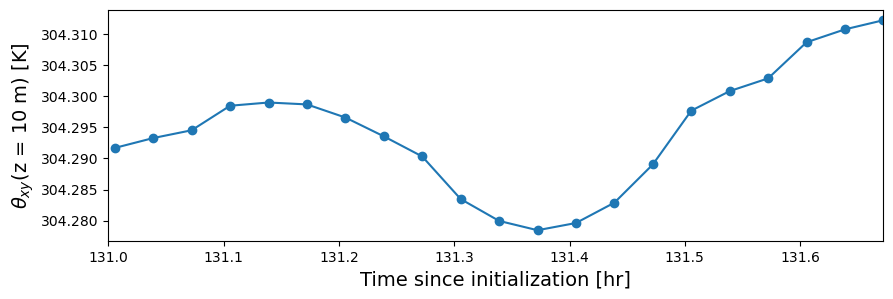

In [16]:
#%% Time series of temperature of air at lowest vertical level


plt.figure(figsize=(10,3))
plt.plot(t_since[:],theta_avg_sp[:,0],'-o')
plt.xlabel('Time since initialization [hr]',fontsize=14)
plt.ylabel(r'$\theta_{xy}$(z = 10 m) [K]',fontsize=14)
plt.xlim(int(t_since[0]),t_since[-1])
plt.show()
plt.close()



In [17]:
#%% Find center of hurricane based on minimum wind speed
center = np.zeros([len(ttime),2]) + np.nan # [x,y]

X_grid,Y_grid = np.meshgrid(n_x,n_y)
X_grid = X_grid.flatten()
Y_grid = Y_grid.flatten()

for iitt in np.arange(np.shape(uv)[0]):
    
    temp_uv = np.zeros(np.shape(uv[iitt,0,:,:])) + uv[iitt,0,:,:]
    temp_uv[0:10,:] = np.nan
    temp_uv[-10:,:] = np.nan
    temp_uv[:,0:10] = np.nan
    temp_uv[:,-10:] = np.nan
    uv_flat = temp_uv.flatten() #uv[-1,0,:,:].flatten()
    uv_flat[np.isnan(uv_flat)] = 0
    max_ws_ref = np.argmax(uv_flat)
    if 'd03' in domain:
        temp_uv = np.zeros(np.shape(uv[iitt,0,:,:])) + uv[iitt,0,:,:]
        temp_uv[0:200,:] = np.nan
        temp_uv[-200:,:] = np.nan
        temp_uv[:,0:200] = np.nan
        temp_uv[:,-200:] = np.nan
        uv_flat = temp_uv.flatten() #uv[-1,0,:,:].flatten()
        max_ws_ref = np.nanargmin(uv_flat)
    
    if 'd01' in domain:
#         if iitt==0:
        lim_low_x = np.mean(n_x) - 0.1*n_x[-1]
        lim_low_y = np.mean(n_x) - 0.1*n_x[-1]
        lim_high_x = np.mean(n_x) + 0.1*n_x[-1]
        lim_high_y = np.mean(n_x) + 0.1*n_x[-1]
#         if iitt==0:
# #             lim_low_x = 1950*1000# X_grid[max_ws_ref] - 0.05*np.mean(n_x)
# #             lim_low_y = 1950*1000# Y_grid[max_ws_ref] - 0.05*np.mean(n_y)
# #             lim_high_x = 2050*1000# X_grid[max_ws_ref] + 0.05*np.mean(n_x)
# #             lim_high_y = 2050*1000# Y_grid[max_ws_ref] + 0.05*np.mean(n_y)
#             lim_low_x = np.mean(n_x) - 0.4*np.mean(n_x)
#             lim_low_y = np.mean(n_y) - 0.4*np.mean(n_y)# - 50*1000
#             lim_high_x = np.mean(n_x) + 0.4*np.mean(n_x)
#             lim_high_y = np.mean(n_y) + 0.4*np.mean(n_y)
        if iitt>0:
#             lim_low_x = center[iitt-1,0] - 0.1*n_x[-1]
#             lim_low_y = center[iitt-1,1] - 0.1*n_x[-1]
#             lim_high_x = center[iitt-1,0] + 0.1*n_x[-1]
#             lim_high_y = center[iitt-1,1] + 0.1*n_x[-1]
            lim_low_x = X_grid[max_ws_ref] - 0.1*n_x[-1]
            lim_low_y = Y_grid[max_ws_ref] - 0.1*n_x[-1]
            lim_high_x = X_grid[max_ws_ref] + 0.1*n_x[-1] 
            lim_high_y = Y_grid[max_ws_ref] + 0.1*n_x[-1]
    elif 'd02' in domain:
#         lim_low_x = np.mean(n_x) - 0.3*np.mean(n_x)
#         lim_low_y = np.mean(n_y) - 0.2*np.mean(n_y)# - 50*1000
#         lim_high_x = np.mean(n_x) + 0.1*np.mean(n_x)
#         lim_high_y = np.mean(n_y) + 0.1*np.mean(n_y)
        lim_low_x = np.mean(n_x) - 0.1*n_x[-1]
        lim_low_y = np.mean(n_x) - 0.1*n_x[-1]
        lim_high_x = np.mean(n_x) + 0.1*n_x[-1]
        lim_high_y = np.mean(n_x) + 0.1*n_x[-1]
    elif 'd03' in domain:
        if iitt==0:
            lim_low_x = X_grid[max_ws_ref] - 0.1*np.mean(n_x)
            lim_low_y = Y_grid[max_ws_ref] - 0.1*np.mean(n_y)
            lim_high_x = X_grid[max_ws_ref] + 0.1*np.mean(n_x)
            lim_high_y = Y_grid[max_ws_ref] + 0.1*np.mean(n_y)  
        else:
            lim_low_x = center[iitt-1,0] - 10000
            lim_low_y = center[iitt-1,1] - 10000
            lim_high_x = center[iitt-1,0] + 10000
            lim_high_y = center[iitt-1,1] + 10000
    else:# 'd04' in WRF_FILES:
#        lim_low_x = X_grid[max_ws_ref] - 0.5*np.mean(n_x)
#        lim_low_y = Y_grid[max_ws_ref] - 0.3*np.mean(n_y)
#        lim_high_x = X_grid[max_ws_ref] + 0.3*np.mean(n_x)
#        lim_high_y = Y_grid[max_ws_ref] + 0.3*np.mean(n_y) 
        lim_low_x = 0.3*np.max(n_x)
        lim_low_y = 0.3*np.max(n_y)
        lim_high_x = 0.6*np.max(n_x)
        lim_high_y = 0.6*np.max(n_x)
        
    # Create small meshgrid
    small_x,small_y = np.meshgrid(n_x[(n_x<lim_high_x)&(n_x>lim_low_x)],n_y[(n_y<lim_high_y)&(n_y>lim_low_y)])
    flat_smallX = small_x.flatten()
    flat_smallY = small_y.flatten()

    # Crop array
    temp_uv_1 = uv[iitt,0,(n_y<lim_high_y)&(n_y>lim_low_y),:]
    temp_uv_2 = temp_uv_1[:,(n_x<lim_high_x)&(n_x>lim_low_x)]
    # Flatten array
    temp_uv_flat = temp_uv_2.flatten()
    # Find location of minimum
    if np.any(temp_uv_flat)==True:
        i_min = np.argmin(temp_uv_flat)
        # Save location of minimum
        center[iitt,0] = flat_smallX[i_min]
        center[iitt,1] = flat_smallY[i_min]
    else:
        # Save location of minimum
        center[iitt,0] = np.mean(n_x)
        center[iitt,1] = np.mean(n_y)

In [18]:
0.5*n_x[-1]

40472.254026412964

In [19]:
center

array([[40944.47661972, 41277.810215  ],
       [41333.36581421, 40833.3654213 ],
       [41611.14381027, 40666.69862366],
       [40388.92062759, 41777.81060791],
       [40722.25422287, 41777.81060791],
       [40777.80982208, 41944.47740555],
       [40666.69862366, 41277.810215  ],
       [40722.25422287, 41222.25461578],
       [40444.47622681, 41000.03221893],
       [40500.03182602, 40277.80942917],
       [40666.69862366, 39888.92023468],
       [39500.03104019, 40000.03143311],
       [39333.36424255, 39222.25304413],
       [39777.80903625, 39388.91984177],
       [40111.14263153, 39055.58624649],
       [40166.69823074, 39000.03064728],
       [40055.58703232, 38333.36345673],
       [40166.69823074, 38666.697052  ],
       [40166.69823074, 38888.91944885],
       [40722.25422287, 39222.25304413],
       [40944.47661972, 39333.36424255]])

In [20]:
#%% Get geometrical center using velocity contours
slow_winds = [5,7,9]
slow_winds = [5,10,15]
geo_center2 = np.zeros([len(ttime),len(slow_winds),2])

dyn_center = center
for iitt in np.arange(len(ttime)):
    ## Limits on what to plot
    lim_low_x = dyn_center[iitt,0] - 0.3*np.mean(n_x)
    lim_low_y = dyn_center[iitt,1] - 0.3*np.mean(n_y)
    lim_high_x = dyn_center[iitt,0] + 0.3*np.mean(n_x)
    lim_high_y = dyn_center[iitt,1] + 0.3*np.mean(n_y)
    
    
    # Get contours for a set of slow wind speeds close to the hurricane center
    small_x = n_x[(n_x>lim_low_x) & (n_x<lim_high_x)]
    small_y = n_y[(n_y>lim_low_y) & (n_y<lim_high_y)]
    small_uv = uv[iitt,iz,(n_y>lim_low_y) & (n_y<lim_high_y),:]
    small_uv = small_uv[:,(n_x>lim_low_x) & (n_x<lim_high_x)]
    cs = plt.contour(small_x/1000,small_y/1000,small_uv, slow_winds)
    paths = cs.collections
    plt.close()
    
#    plt.figure()
#    plt.contourf(small_x/1000,small_y/1000,small_uv)
#    plt.contour(small_x/1000,small_y/1000,small_uv, slow_winds,cmap=plt.cm.binary)
#    plt.show()
    
    # Get vertices of contours for each wind speed
    for i_ws in np.arange(len(slow_winds)):
        allP = paths[i_ws].get_paths()
        # Find longest path
        longest = 0
        len_longest = 0
        if len(allP)>0:
            for i_p in np.arange(len(allP)):
                if len(allP[i_p]) > len_longest:
                    longest = i_p
                    len_longest = len(allP[i_p])
            path = allP[longest]
            verts = path.vertices
            x_contour = verts[:,0]
            y_contour = verts[:,1]
            geo_center2[iitt,i_ws,0] = np.mean(x_contour)*1000
            geo_center2[iitt,i_ws,1] = np.mean(y_contour)*1000
        

/tmp/ipykernel_1992890/471758227.py:21: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = cs.collections


In [21]:
#%% Choose which method for finding the center
meth_cent = 'oth'
if meth_cent=='geo':
    temp_cent = np.zeros_like(geo_center2[:,1,:]) + geo_center2[:,2,:] + 0.0
else:
    temp_cent = np.zeros_like(center) + center + 0.0


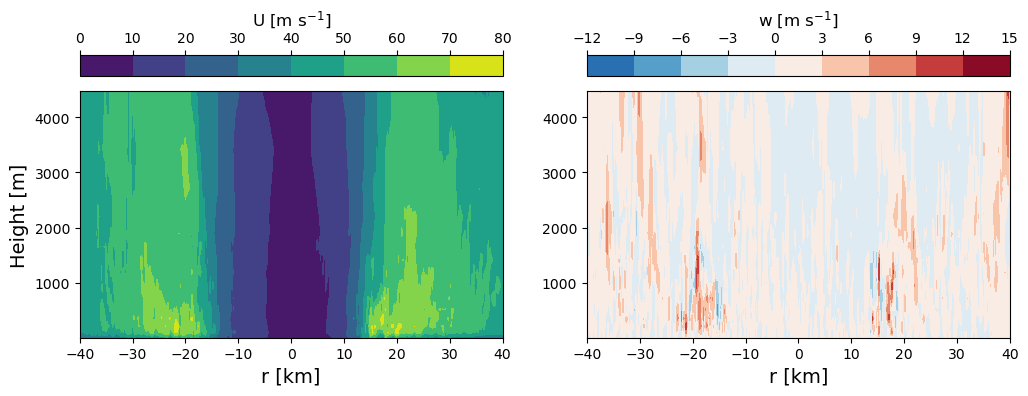

In [22]:
#%% Slice of horizontal and vertical velocity for hurricane
it = -1

r_x = (n_x - temp_cent[-1,0])/1000
xx_lim = np.min([-1*np.min(r_x),np.max(r_x)])

fig,axs = plt.subplots(1,2,figsize=(12,4))
# Horizontal velocity
im1 = axs[0].contourf(r_x,height_agl,uv[it,:,int(temp_cent[it,1]/dx),:])
axs[0].set_xlim(-1*xx_lim,xx_lim)
axs[0].set_xlabel('r [km]',fontsize=14)
axs[0].set_ylabel('Height [m]',fontsize=14)
cbar1 = fig.colorbar(im1, ax=[axs[0]], location='top')
cbar1.set_label(r'U [m s$^{-1}$]',fontsize=12)

# Vertical velocity
newCmap = cmocean.tools.crop(plt.cm.RdBu_r, np.min(w[it,:,int(temp_cent[it,1]/dx),:]), np.max(w[it,:,int(temp_cent[it,1]/dx),:]), 0)
im2 = axs[1].contourf(r_x,height_agl,w[it,:,int(temp_cent[it,1]/dx),:],cmap=newCmap)
axs[1].set_xlim(-1*xx_lim,xx_lim)
axs[1].set_xlabel('r [km]',fontsize=14)
cbar2 = fig.colorbar(im2, ax=[axs[1]], location='top')
cbar2.set_label(r'w [m s$^{-1}$]',fontsize=12)

#plt.tight_layout()
plt.show()
plt.close()  

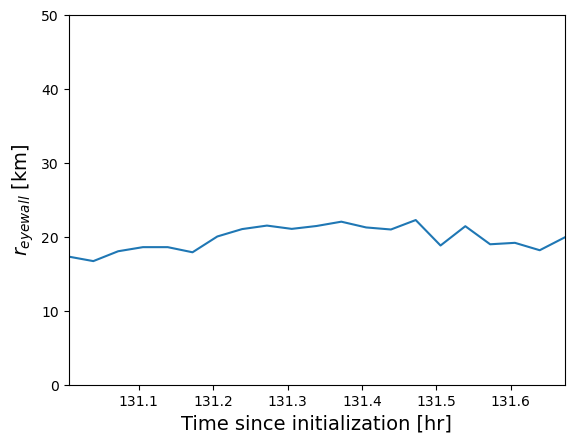

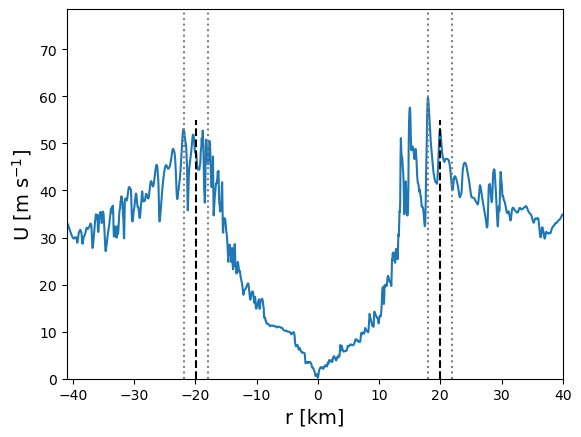

[17333.34695435 16722.23536301 18055.56974411 18611.12573624
 18611.12573624 17916.68074608 20055.57131577 21055.57210159
 21527.7946949  21083.3499012  21472.23909569 22055.57288742
 21277.79449844 21000.01650238 22277.79528427 18833.34813309
 21444.46129608 19000.01493073 19194.45952797 18194.45874214
 19916.68231773]
19792.343595686412


In [23]:
#%% Find radius of eyewall in hurricane
r_eye = np.zeros(np.shape(ttime))
r1 = np.zeros(np.shape(ttime))
r2 = np.zeros(np.shape(ttime))

# Find radius of eyewall for each time
for ii in np.arange(len(ttime)):
    temp_uv = np.zeros(np.shape(uv[ii,0,:,:])) + uv[ii,0,:,:]
    temp_uv[0:10,:] = 0
    temp_uv[-10:,:] = 0
    temp_uv[:,0:10] = 0
    temp_uv[:,-10:] = 0
    
    i_r_max1 = np.argmax(temp_uv[int(temp_cent[ii,1]/dx),int(temp_cent[ii,0]/dx):])
    i_r_max2 = np.argmax(temp_uv[int(temp_cent[ii,1]/dx),0:int(temp_cent[ii,0]/dx)])
    r1[ii] = np.abs(n_x[int(temp_cent[ii,0]/dx):][i_r_max1] - temp_cent[ii,0])
    r2[ii] = np.abs(n_x[0:int(temp_cent[ii,0]/dx)][i_r_max2] - temp_cent[ii,0])
    r_eye[ii] = 0.5*(r1[ii] + r2[ii])

# Temporal evolution of hurricane eyewall
plt.figure()
plt.plot(t_since,r_eye/1000)
plt.xlabel('Time since initialization [hr]',fontsize=14)
plt.ylabel(r'$r_{eyewall}$ [km]',fontsize=14)
plt.xlim(t_since[0],t_since[-1])
plt.ylim(0,50)
plt.show()
plt.close() 

# Plot of wind speed
it = -1
plt.figure()
plt.plot((n_x-center[it,0])/1000,uv[it,0,int(temp_cent[it,1]/dx),:])
plt.plot(np.array([r_eye[it],r_eye[it]])/1000,[0,50+5],'--k')
plt.plot(np.array([-1*r_eye[it],-1*r_eye[it]])/1000,[0,50+5],'--k')

plt.plot(np.array([-1*r1[it],-1*r1[it]])/1000,[0,np.max(uv[:,0,int(temp_cent[it,1]/dx),:])+5],':',color='grey')
plt.plot(np.array([-1*r2[it],-1*r2[it]])/1000,[0,np.max(uv[:,0,int(temp_cent[it,1]/dx),:])+5],':',color='grey')

plt.plot(np.array([r1[it],r1[it]])/1000,[0,np.max(uv[:,0,int(temp_cent[it,1]/dx),:])+5],':',color='grey')
plt.plot(np.array([r2[it],r2[it]])/1000,[0,np.max(uv[:,0,int(temp_cent[it,1]/dx),:])+5],':',color='grey')

plt.xlim(np.min((n_x - center[it,0])/1000),np.max((n_x - center[it,0])/1000))
plt.xlim(np.max([-200,r_x[0]]),np.min([200,r_x[-1]]))
plt.ylim(0,np.max(uv[:,0,int(temp_cent[it,1]/dx),:])+5)
plt.xlabel('r [km]',fontsize=14)
plt.ylabel('U [m s$^{-1}$]',fontsize=14)
plt.show()
plt.close()  

print(r_eye)
print(np.mean(r_eye[t_since>120]))


In [24]:
np.mean(r_eye)

19792.343595686412

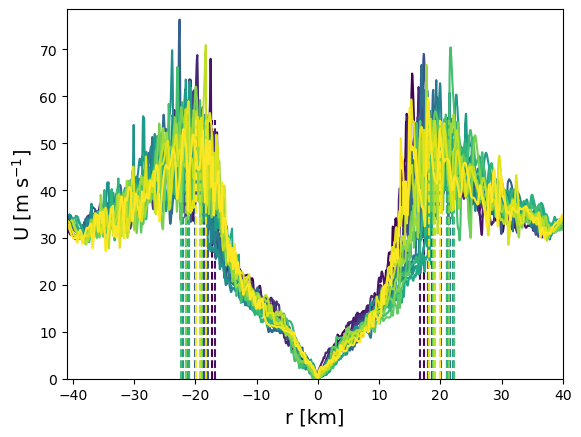

In [25]:
#%% Evolution of radius of maximum winds
cols = plt.cm.viridis(np.linspace(0,1,len(ttime)))
plt.figure()
for it in np.arange(len(ttime)):
    plt.plot((n_x-center[it,0])/1000,uv[it,0,int(temp_cent[it,1]/dx),:],color=cols[it])
    plt.plot(np.array([r_eye[it],r_eye[it]])/1000,[0,50+5],'--',color=cols[it])
    plt.plot(np.array([-1*r_eye[it],-1*r_eye[it]])/1000,[0,50+5],'--',color=cols[it])

plt.xlim(np.min((n_x - temp_cent[it,0])/1000),np.max((n_x - temp_cent[it,0])/1000))
plt.xlim(np.max([-350,r_x[0]]),np.min([350,r_x[-1]]))
plt.ylim(0,np.max(uv[:,0,int(temp_cent[it,1]/dx),:])+5)
plt.xlabel('r [km]',fontsize=14)
plt.ylabel('U [m s$^{-1}$]',fontsize=14)
plt.show()
plt.close() 


In [26]:
# center[-8:-5,:]
center

array([[40944.47661972, 41277.810215  ],
       [41333.36581421, 40833.3654213 ],
       [41611.14381027, 40666.69862366],
       [40388.92062759, 41777.81060791],
       [40722.25422287, 41777.81060791],
       [40777.80982208, 41944.47740555],
       [40666.69862366, 41277.810215  ],
       [40722.25422287, 41222.25461578],
       [40444.47622681, 41000.03221893],
       [40500.03182602, 40277.80942917],
       [40666.69862366, 39888.92023468],
       [39500.03104019, 40000.03143311],
       [39333.36424255, 39222.25304413],
       [39777.80903625, 39388.91984177],
       [40111.14263153, 39055.58624649],
       [40166.69823074, 39000.03064728],
       [40055.58703232, 38333.36345673],
       [40166.69823074, 38666.697052  ],
       [40166.69823074, 38888.91944885],
       [40722.25422287, 39222.25304413],
       [40944.47661972, 39333.36424255]])

In [27]:
#%% Project velocity components from Cartesian reference frame to normal and tangential reference frame

n_x_r = n_x - np.mean(center[:,0])
n_y_r = n_y - np.mean(center[:,1])

U_t = np.zeros_like(u)
U_n = np.zeros_like(u)
for ix in np.arange(len(n_x_r)):
    for iy in np.arange(len(n_y_r)):
        theta = np.arctan2(n_y_r[iy],n_x_r[ix])
        # t = -i sin(theta) + j cos(theta)
        U_t[:,:,iy,ix] = -1*u[:,:,iy,ix]*np.sin(theta) + v[:,:,iy,ix]*np.cos(theta)
        # n = - i cos(theta) -j sin(theta) 
        U_n[:,:,iy,ix] = -1*u[:,:,iy,ix]*np.cos(theta) - v[:,:,iy,ix]*np.sin(theta)
        
# Change from normal velocity to radial velocity
U_n = -1*U_n

/tmp/ipykernel_1992890/1427561090.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  azmth_w_r[it,ia,iz,ir] = ww[0,:]
/tmp/ipykernel_1992890/1427561090.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  azmth_Ut_r[it,ia,iz,ir] = ww[0,:]
/tmp/ipykernel_1992890/1427561090.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  azmth_Un_r[it,ia,iz,ir] = ww[0,:]


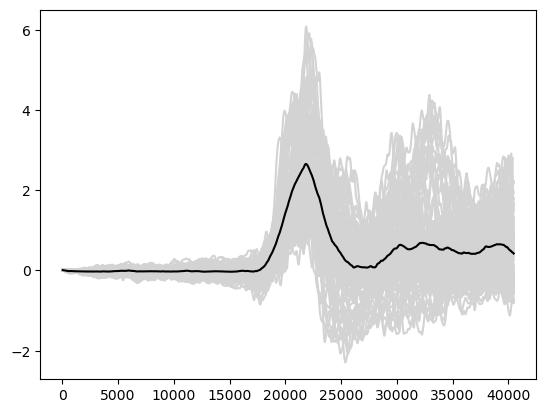

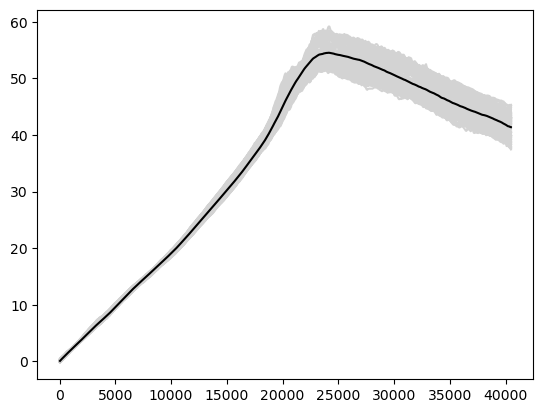

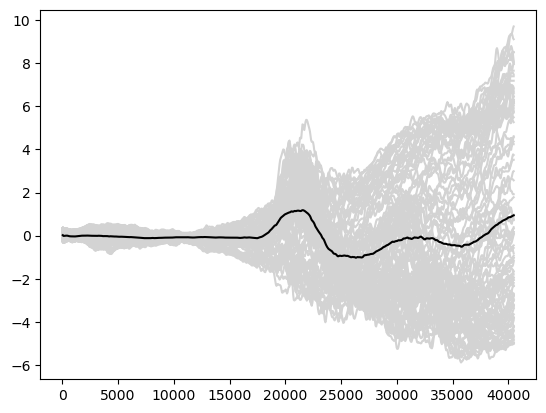

In [28]:
#%% Azimuthally and temporally averaged velocity fields (LES only)
azmth = np.linspace(1,359,100)

## Radial vector
rr_ = n_x_r[n_x_r>=0]

# Vertical velocity
azmth_w_r = np.zeros([len(ttime),len(azmth),len(height_agl),len(rr_)])
for it in np.arange(len(ttime)):
    for iz in np.arange(len(height_agl)):
        f = scipy.interpolate.RectBivariateSpline(n_y_r,n_x_r,w[it,iz,:,:])
        for ia in np.arange(len(azmth)):
            x = rr_*np.cos(azmth[ia]*np.pi/180)
            y = rr_*np.sin(azmth[ia]*np.pi/180)
            for ir in np.arange(len(x)):
                ww = f(y[ir],x[ir])
                azmth_w_r[it,ia,iz,ir] = ww[0,:]
plt.figure()
for ia in np.arange(len(azmth)):
    plt.plot(rr_,np.mean(azmth_w_r[:,ia,-1,:],axis=0),color='lightgrey')
plt.plot(rr_,np.mean(azmth_w_r[:,:,-1,:],axis=(0,1)),'-k')


# Tangential velocity
azmth_Ut_r = np.zeros([len(ttime),len(azmth),len(height_agl),len(rr_)])
for it in np.arange(len(ttime)):
    for iz in np.arange(len(height_agl)):
        f = scipy.interpolate.RectBivariateSpline(n_y_r,n_x_r,U_t[it,iz,:,:])
        for ia in np.arange(len(azmth)):
            x = rr_*np.cos(azmth[ia]*np.pi/180)
            y = rr_*np.sin(azmth[ia]*np.pi/180)
            for ir in np.arange(len(x)):
                ww = f(y[ir],x[ir])
                azmth_Ut_r[it,ia,iz,ir] = ww[0,:]
plt.figure()
for ia in np.arange(len(azmth)):
    plt.plot(rr_,np.mean(azmth_Ut_r[:,ia,-1,:],axis=0),color='lightgrey')
plt.plot(rr_,np.mean(azmth_Ut_r[:,:,-1,:],axis=(0,1)),'-k')


# Radial velocity
azmth_Un_r = np.zeros([len(ttime),len(azmth),len(height_agl),len(rr_)])
for it in np.arange(len(ttime)):
    for iz in np.arange(len(height_agl)):
        f = scipy.interpolate.RectBivariateSpline(n_y_r,n_x_r,U_n[it,iz,:,:])
        for ia in np.arange(len(azmth)):
            x = rr_*np.cos(azmth[ia]*np.pi/180)
            y = rr_*np.sin(azmth[ia]*np.pi/180)
            for ir in np.arange(len(x)):
                ww = f(y[ir],x[ir])
                azmth_Un_r[it,ia,iz,ir] = ww[0,:]
plt.figure()
for ia in np.arange(len(azmth)):
    plt.plot(rr_,np.mean(azmth_Un_r[:,ia,-1,:],axis=0),color='lightgrey')
plt.plot(rr_,np.mean(azmth_Un_r[:,:,-1,:],axis=(0,1)),'-k')



In [29]:
#%% Time- and azimuth-averaged velocity fields
mean_azmth_w_r = np.mean(azmth_w_r,axis=(0,1))
mean_azmth_Ut_r = np.mean(azmth_Ut_r,axis=(0,1))
mean_azmth_Un_r = np.mean(azmth_Un_r,axis=(0,1))

mean_azmth_Ut_r_mv_avg = np.zeros_like(mean_azmth_Ut_r) + mean_azmth_Ut_r
ddxx = 1500 # 1000
nnxx = int(ddxx/dx)
for iz in np.arange(len(height_agl)):
    mean_azmth_Ut_r_mv_avg[iz,:] = moving_average(mean_azmth_Ut_r_mv_avg[iz,:], nnxx, 'same')


In [30]:
#%% Find radius of maximum wind speed

RMW = rr_[np.argmax(mean_azmth_Ut_r[0,:])]

print('Radius of maximum wind speed at r = %f km' % (RMW/1000))

Radius of maximum wind speed at r = 18.425940 km


In [31]:
#%% Radial gradient of tangential velocity

dUt_dr_test0 = mean_azmth_Ut_r[:,1:] - mean_azmth_Ut_r[:,0:-1]
dUt_dr_test2 = mean_azmth_Ut_r_mv_avg[:,1:] - mean_azmth_Ut_r_mv_avg[:,0:-1]

# Choose option
dUt_dr = dUt_dr_test2 # dUt_dr_test0
for iz in np.arange(len(height_agl)):
    dUt_dr[iz,:] = moving_average(dUt_dr[iz,:], nnxx, 'same')



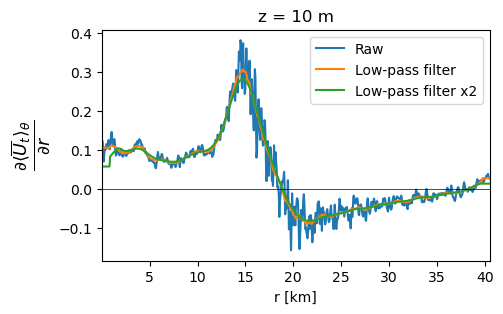

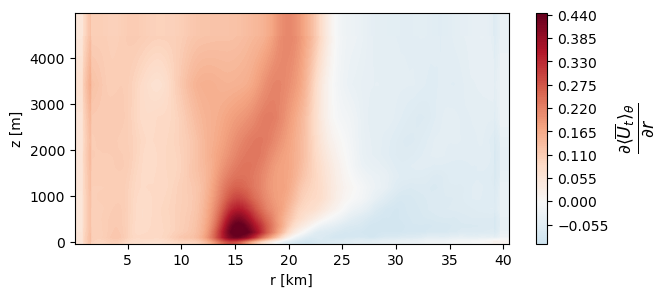

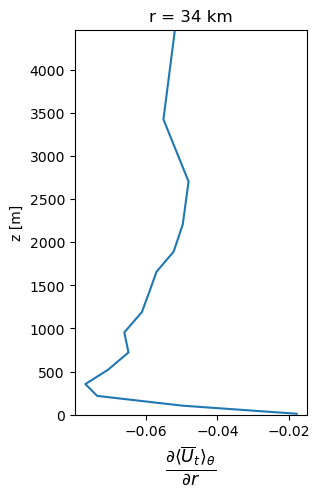

In [32]:
# Visualize radial evolution of gradient for one height
plt.figure(figsize=(5,3))
plt.plot(rr_[1:]/1000,dUt_dr_test0[0,:],label='Raw')
plt.plot(rr_[1:]/1000,moving_average(dUt_dr_test0[0,:], nnxx, 'same'),label='Low-pass filter')
# plt.plot(rr_[1:]/1000,dUt_dr_test2[0,:])
plt.plot(rr_[1:]/1000,moving_average(dUt_dr_test2[0,:], nnxx, 'same'),label='Low-pass filter x2')
plt.plot(rr_/1000,0*rr_,'-k',linewidth=0.5)
plt.xlim(rr_[0]/1000,rr_[-1]/1000)
plt.ylabel(r"$\frac{\partial \langle\overline{U}_t\rangle_{\theta}}{\partial r}$",fontsize=18)
plt.xlabel("r [km]")
plt.legend()
plt.title("z = " + str(int(height_agl[0])) + " m")
plt.show()
plt.close()

# Visualize height-radial evolution of gradient
tmp = np.zeros_like(dUt_dr) + dUt_dr
minn = -0.1 #np.min(tmp)
maxx = 0.45 #np.max(tmp)
tmp[tmp<minn] = minn
tmp[tmp>maxx] = maxx
newCmap = cmocean.tools.crop(plt.cm.RdBu_r,minn,maxx, 0)

plt.figure(figsize=(7,3))
plt.pcolormesh(rr_[1:]/1000,height_agl,dUt_dr,cmap=newCmap,vmin=minn,vmax=maxx)
im1 = plt.contourf(rr_[1:]/1000,height_agl,dUt_dr,cmap=newCmap,levels=np.arange(minn,maxx,0.005))
cbar = plt.colorbar(im1)
cbar.set_label(r"$\frac{\partial \langle\overline{U}_t\rangle_{\theta}}{\partial r}$",fontsize=18)
plt.xlabel("r [km]")
plt.ylabel("z [m]")
plt.show()
plt.close()

# Vertical profile of gradient at one radial location
i_r = np.argmin(np.abs(rr_ - 35000))
plt.figure(figsize=(3,5))
plt.title("r = "+ str(int(rr_[i_r]/1000)) + " km" )
plt.plot(dUt_dr[:,i_r],height_agl)
plt.xlabel(r"$\frac{\partial \langle\overline{U}_t\rangle_{\theta}}{\partial r}$",fontsize=18)
plt.ylabel("z [m]")
plt.ylim(0,height_agl[-1])
plt.show()
plt.close()


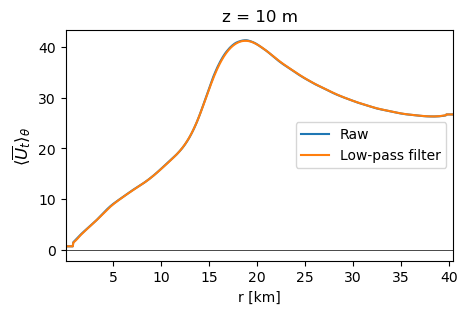

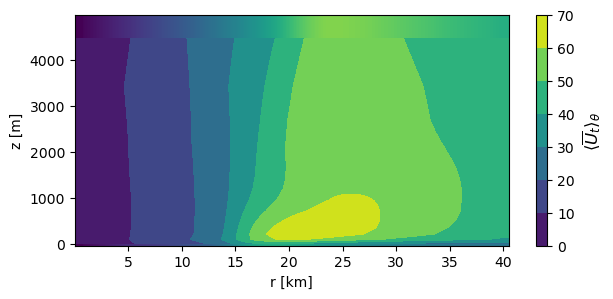

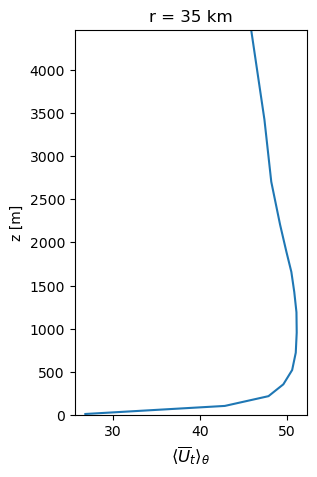

In [35]:
# Visualize radial evolution of tangential wind speed for one height
plt.figure(figsize=(5,3))
plt.plot(rr_/1000,mean_azmth_Ut_r_mv_avg[0,:],label='Raw')
plt.plot(rr_/1000,moving_average(mean_azmth_Ut_r_mv_avg[0,:], nnxx, 'same'),label='Low-pass filter')
plt.plot(rr_/1000,0*rr_,'-k',linewidth=0.5)
plt.xlim(rr_[0]/1000,rr_[-1]/1000)
plt.ylabel(r"$\langle\overline{U}_t\rangle_{\theta}$",fontsize=12)
plt.xlabel("r [km]")
plt.legend()
plt.title("z = " + str(int(height_agl[0])) + " m")
plt.show()
plt.close()

# Visualize height-radial evolution of tangential wind speed
plt.figure(figsize=(7,3))
plt.pcolormesh(rr_/1000,height_agl,mean_azmth_Ut_r_mv_avg)
im1 = plt.contourf(rr_/1000,height_agl,mean_azmth_Ut_r_mv_avg)
cbar = plt.colorbar(im1)
cbar.set_label(r"$\langle\overline{U}_t\rangle_{\theta}$",fontsize=12)
plt.xlabel("r [km]")
plt.ylabel("z [m]")
plt.show()
plt.close()

# Vertical profile of tangential wind speed at one radial location
i_r = np.argmin(np.abs(rr_ - 35000))
plt.figure(figsize=(3,5))
plt.title("r = "+ str(int(rr_[i_r]/1000)) + " km" )
plt.plot(mean_azmth_Ut_r_mv_avg[:,i_r],height_agl)
plt.xlabel(r"$\langle\overline{U}_t\rangle_{\theta}$",fontsize=12)
plt.ylabel("z [m]")
plt.ylim(0,height_agl[-1])
plt.show()
plt.close()


In [34]:
#%% Save data to run George Bryan's simple method
dir_save = '/projects/storm/GB_simpleMethod/'

rrs_to_save = np.arange(1.1*RMW,rr_[-50],7*dx)

with open(dir_save+'dV_dr_cat3.txt','w') as file:
    file.write('Radius [m], dV/dr at height z_i [1/s]')
    file.write('\n')
    for i in np.arange(len(rrs_to_save)):
        i_r = np.argmin(np.abs(rr_ - rrs_to_save[i]))
        strr = str(rrs_to_save[i]) + ',' 
        for iz in np.arange(len(height_agl)):
            strr = strr + str(dUt_dr[iz,i_r]) + ','
        file.write(strr)
        file.write('\n')

with open(dir_save+'V_cat3.txt','w') as file:
    file.write('Radius [m], V at height z_i [m/s]')
    file.write('\n')
    for i in np.arange(len(rrs_to_save)):
        i_r = np.argmin(np.abs(rr_ - rrs_to_save[i]))
        strr = str(rrs_to_save[i]) + ',' 
        for iz in np.arange(len(height_agl)):
            strr = strr + str(mean_azmth_Ut_r_mv_avg[iz,i_r]) + ','
        file.write(strr)
        file.write('\n')
        
with open(dir_save+'z_cat3.txt','w') as file:
    file.write('Height z_i [m]')
    file.write('\n')
    for iz in np.arange(len(height_agl)):
        if iz ==0:
            strr = str(height_agl[iz]) + ',' 
        else:
            strr = strr + str(height_agl[iz]) + ','
    file.write(strr)
    file.write('\n')
        

## Heat flux and friction velocity from the mesoscale

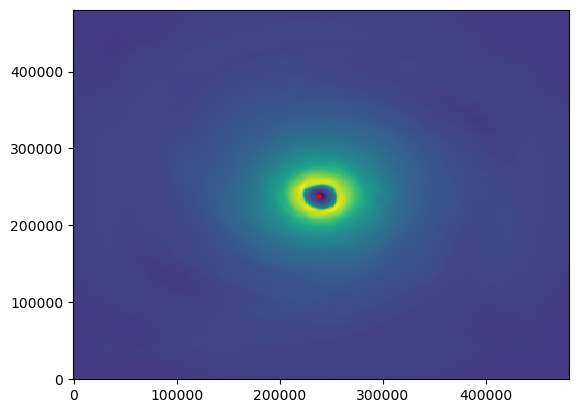

/tmp/ipykernel_1992890/203341733.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hfx_les[iy,ix] = ww[0,:]
/tmp/ipykernel_1992890/203341733.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_star_les[iy,ix] = ww[0,:]


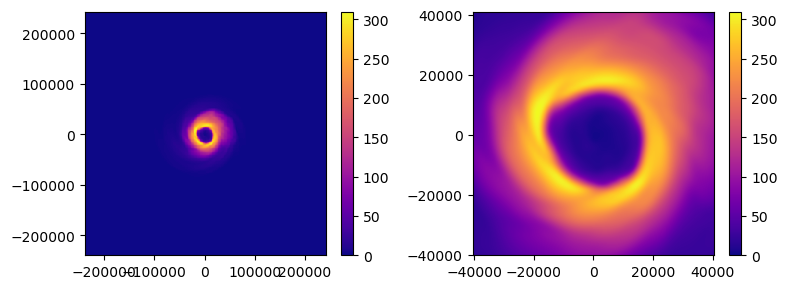

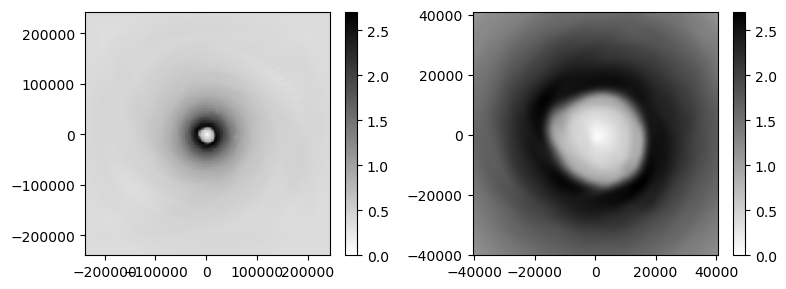

In [83]:
#%% Extract data for surface heat flux

# Load data from restart file to check surface boundary conditions
rst_fle = "wrfrst_d01_2000-01-06_12:00:26"
dir_rst = '/projects/storm/mgomez/idealSims/sst_30_skipd01_skipCoLES_ndg/Results/'
ds=xr.open_dataset(dir_rst+rst_fle,decode_times=False)
u_meso = np.array(ds['U_1'])
u_meso = 0.5*(u_meso[0,0,:,1:] + u_meso[0,0,:,0:-1])
v_meso = np.array(ds['V_1'])
v_meso = 0.5*(v_meso[0,0,1:,:] + v_meso[0,0,0:-1,:])
uv_meso = (u_meso**2 + v_meso**2)**0.5
cd = np.array(ds['CD'])
ck = np.array(ds['CK'])
xland = np.array(ds['XLAND'])
z_0 = np.array(ds['ZNT'])
z_0_cnst = np.array(ds['Z0'])
hfx = np.array(ds['HFX'])
u_star = np.array(ds['UST'])
cd = cd[0,:,:]
ck = ck[0,:,:]
xland = xland[0,:,:]
z_0 = z_0[0,:,:]
z_0_cnst = z_0_cnst[0,:,:]
hfx = hfx[0,:,:]
u_star = u_star[0,:,:]
dx_meso = ds.DX
n_x_meso = np.arange(0,np.shape(hfx)[0])*dx_meso
ds.close()
ds = 0.0

# Center of hurricane
X_grid,Y_grid = np.meshgrid(n_x_meso,n_x_meso)
X_grid = X_grid.flatten()
Y_grid = Y_grid.flatten()
tmp = np.zeros_like(uv_meso) + uv_meso
tmp[0:100,:] = np.nan
tmp[:,0:100] = np.nan
tmp[-100:,:] = np.nan
tmp[:,-100:] = np.nan
tmp = tmp.flatten()
cent_meso = np.array([X_grid[np.nanargmin(tmp)-1],Y_grid[np.nanargmin(tmp)-1]])

plt.figure()
plt.pcolormesh(n_x_meso,n_x_meso,uv_meso)
plt.scatter(cent_meso[0],cent_meso[1],s=5,color='red')
plt.show()
plt.close()

# Interpolate from mesoscale to LES grid
hfx_les = np.zeros_like(uv[0,0,:,:])
u_star_les = np.zeros_like(uv[0,0,:,:])
n_x_meso_r = n_x_meso - cent_meso[0]
n_y_meso_r = n_x_meso - cent_meso[1]
# heat flux
f = scipy.interpolate.RectBivariateSpline(n_x_meso_r,n_y_meso_r,hfx)
for ix in np.arange(len(n_x_r)):
    for iy in np.arange(len(n_y_r)):
        x = n_x_r[ix]
        y = n_y_r[iy]
        ww = f(y,x)
        hfx_les[iy,ix] = ww[0,:]
# u_star
f = scipy.interpolate.RectBivariateSpline(n_x_meso_r,n_y_meso_r,u_star)
for ix in np.arange(len(n_x_r)):
    for iy in np.arange(len(n_y_r)):
        x = n_x_r[ix]
        y = n_y_r[iy]
        ww = f(y,x)
        u_star_les[iy,ix] = ww[0,:]
        
plt.figure(figsize=(8,3))
minn = 0
maxx = np.max(hfx)
plt.subplot(1,2,1)
plt.pcolormesh(n_x_meso_r,n_y_meso_r,hfx,cmap=plt.cm.plasma,vmin=minn,vmax=maxx)
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(n_x_r,n_y_r,hfx_les,cmap=plt.cm.plasma,vmin=minn,vmax=maxx)
plt.colorbar()

plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(8,3))
minn = 0
maxx = np.max(u_star)
plt.subplot(1,2,1)
plt.pcolormesh(n_x_meso_r,n_y_meso_r,u_star,cmap=plt.cm.binary,vmin=minn,vmax=maxx)
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(n_x_r,n_y_r,u_star_les,cmap=plt.cm.binary,vmin=minn,vmax=maxx)
plt.colorbar()

plt.tight_layout()
plt.show()
plt.close()


/tmp/ipykernel_1992890/2213265703.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  azmth_hfx_r[ia,ir] = ww[0,:]


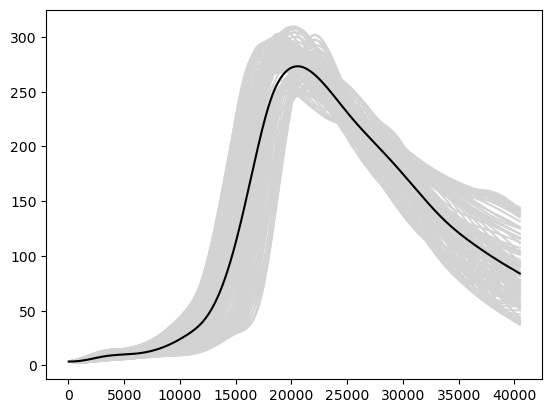

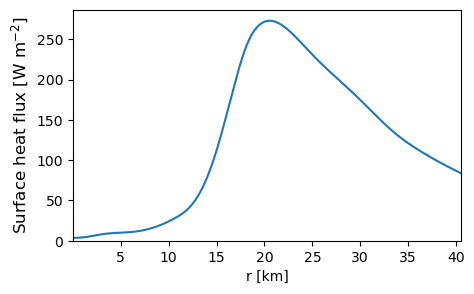

/tmp/ipykernel_1992890/2213265703.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  azmth_u_star_r[ia,ir] = ww[0,:]


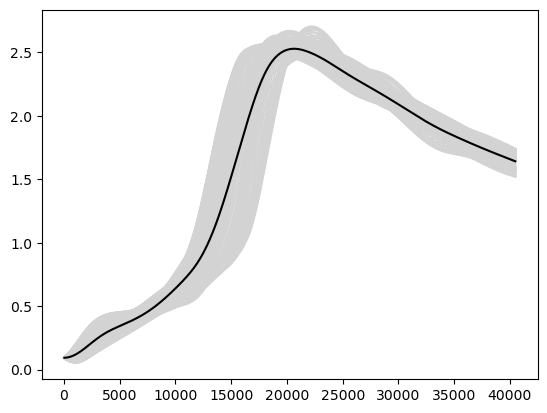

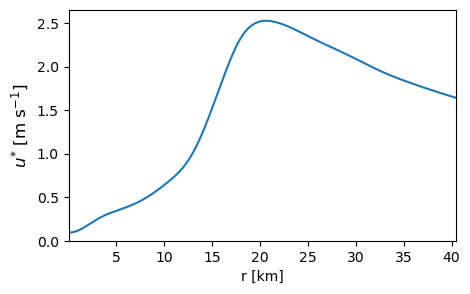

In [86]:
#%% Azimuthally averaged heat flux and friction velocity
# Heat flux
azmth_hfx_r = np.zeros([len(azmth),len(rr_)])
f = scipy.interpolate.RectBivariateSpline(n_y_r,n_x_r,hfx_les[:,:])
for ia in np.arange(len(azmth)):
    x = rr_*np.cos(azmth[ia]*np.pi/180)
    y = rr_*np.sin(azmth[ia]*np.pi/180)
    for ir in np.arange(len(x)):
        ww = f(y[ir],x[ir])
        azmth_hfx_r[ia,ir] = ww[0,:]
mean_azmth_hfx_r = np.mean(azmth_hfx_r,axis=0)
plt.figure()
for ia in np.arange(len(azmth)):
    plt.plot(rr_,azmth_hfx_r[ia,:],color='lightgrey')
plt.plot(rr_,np.mean(azmth_hfx_r,axis=0),'-k')
plt.show()
plt.close()
plt.figure(figsize=(5,3))
plt.plot(rr_/1000,mean_azmth_hfx_r)
plt.ylabel(r"Surface heat flux [W m$^{-2}$]",fontsize=12)
plt.xlabel("r [km]")
plt.xlim(rr_[0]/1000,rr_[-1]/1000)
plt.ylim(0,1.05*np.max(mean_azmth_hfx_r))
plt.show()
plt.close()

# Friction velocity
azmth_u_star_r = np.zeros([len(azmth),len(rr_)])
f = scipy.interpolate.RectBivariateSpline(n_y_r,n_x_r,u_star_les[:,:])
for ia in np.arange(len(azmth)):
    x = rr_*np.cos(azmth[ia]*np.pi/180)
    y = rr_*np.sin(azmth[ia]*np.pi/180)
    for ir in np.arange(len(x)):
        ww = f(y[ir],x[ir])
        azmth_u_star_r[ia,ir] = ww[0,:]
mean_azmth_u_star_r = np.mean(azmth_u_star_r,axis=0)
plt.figure()
for ia in np.arange(len(azmth)):
    plt.plot(rr_,azmth_u_star_r[ia,:],color='lightgrey')
plt.plot(rr_,np.mean(azmth_u_star_r,axis=0),'-k')
plt.show()
plt.close()
plt.figure(figsize=(5,3))
plt.plot(rr_/1000,mean_azmth_u_star_r)
plt.ylabel(r"$u^{*}$ [m s$^{-1}$]",fontsize=12)
plt.xlabel("r [km]")
plt.xlim(rr_[0]/1000,rr_[-1]/1000)
plt.ylim(0,1.05*np.max(mean_azmth_u_star_r))
plt.show()
plt.close()

In [88]:
with open(dir_save+'hfx_cat3.txt','w') as file:
    file.write('Radius [m], Upward surface heat flux [W/m2]')
    file.write('\n')
    for i in np.arange(len(rrs_to_save)):
        i_r = np.argmin(np.abs(rr_ - rrs_to_save[i]))
        strr = str(rrs_to_save[i]) + ',' +str(mean_azmth_hfx_r[i_r])+ ','
        file.write(strr)
        file.write('\n')

with open(dir_save+'u_star_cat3.txt','w') as file:
    file.write('Radius [m], Friction velocity [m/s]')
    file.write('\n')
    for i in np.arange(len(rrs_to_save)):
        i_r = np.argmin(np.abs(rr_ - rrs_to_save[i]))
        strr = str(rrs_to_save[i]) + ',' +str(mean_azmth_u_star_r[i_r])+ ','
        file.write(strr)
        file.write('\n')
        

In [79]:
dir_save

'/projects/storm/GB_simpleMethod/'